# Bonus 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
import config


In [3]:
engine = create_engine(f'postgresql://{config.password}@localhost:5432/SQL_Challenge_NWU')
connection = engine.connect()


In [14]:
# TODO 1: Import the SQL database into Pandas
query = "SELECT salary FROM salaries ORDER BY salary;" 
salary_data = pd.read_sql(query, connection)
salary_data

,salary
0,40000
1,40000
2,40000
3,40000
4,40000
...,...
300019,125469
300020,126703
300021,127041
300022,127238


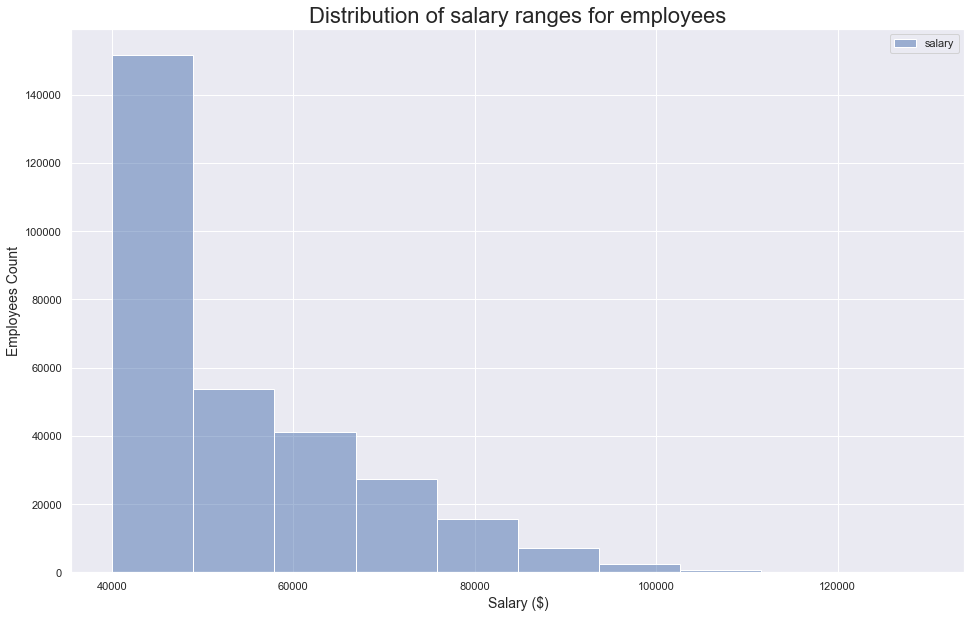

In [50]:
# TODO 2: Create a histogram to visualize the most common salary ranges for employees.
plt.figure(figsize=(16, 10))
sns.set(style="darkgrid")
sns.histplot(data=salary_data,bins=10)
plt.ylabel(f'Employees Count',fontsize=14)
plt.xlabel('Salary ($)',fontsize=14)
plt.title("Distribution of salary ranges for employees",fontsize=22)
plt.savefig("EmployeeSQL/Images/salary_hitogram", bbox_inches='tight')
plt.show()

In [48]:
# TODO 3: Create a bar chart of average salary by title.
# A query for the avearge salary
avearge_query = "SELECT titles.title, ROUND(AVG(salaries.salary)) \
    FROM salaries  \
    INNER JOIN employees \
    ON salaries.emp_no =employees.emp_no \
    INNER JOIN titles \
    ON employees.emp_title_id = titles.title_id \
    GROUP BY titles.title \
    ORDER BY ROUND;" 
avearge_salary_data = pd.read_sql(avearge_query, connection)
avearge_salary_data

,title,round
0,Senior Engineer,48507.0
1,Engineer,48535.0
2,Assistant Engineer,48564.0
3,Technique Leader,48583.0
4,Manager,51531.0
5,Staff,58465.0
6,Senior Staff,58550.0


<function matplotlib.pyplot.show(close=None, block=None)>

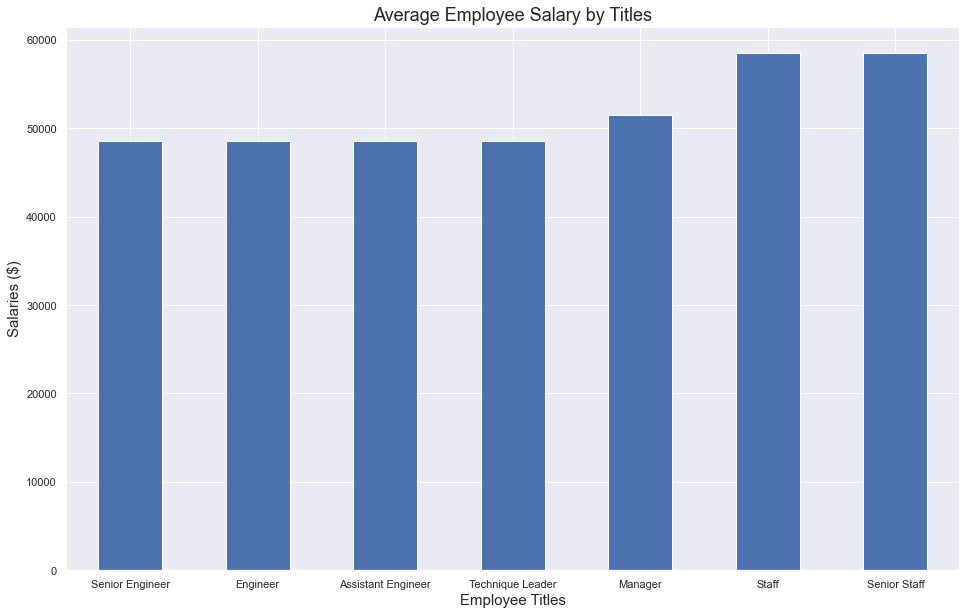

In [75]:
sns.set(style="darkgrid")

x_axis=avearge_salary_data["title"]
ticks = np.arange(len(x_axis))
avearge_salary_data.plot(kind='bar',figsize=(16, 10),legend=False)
plt.xlabel("Employee Titles",size=15)
plt.ylabel("Salaries ($)",size=15)
plt.title("Average Employee Salary by Titles",size=18)
plt.xticks(ticks, x_axis, rotation="vertical")
plt.xticks(rotation=0)
plt.savefig("EmployeeSQL/Images/avg_salary_title", bbox_inches='tight')

plt.show